# Gibbs Sampling
### Motivating Example

We aim to model nuclear pump fails. We observe  number of failures ($P_i$) and failure time ($t_i$). We model the failure of the ith pump as a Poisson process with parameter $\lambda_i$, thus during an interval length $t_i$, the number of failures $P_i\sim Poisson(\lambda_it_i)$. Er are interested in infering the paremters $\lambda_{1:10} = (\lambda_1,...,\lambda_{10})$  from the data. We follow a hierarchical Bayesian approach:
$$
p_i| \lambda_i \sim Poisson(\lambda_it_i)\\
\lambda_i|\beta \sim Gamma(1.8,\beta)\\
\beta \sim Gamma(0.001, 1)
$$

The real dataset The real data set $\{p_i,t_i\}_{i=1:10}$ is given below.

In [12]:
using Distributions
using StatsPlots

┌ Info: Recompiling stale cache file /home/davi/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/davi/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190


In [10]:
data = [[5 1 5 14 3 19 1 1 4 22];[94.32 15.72 62.88 125.76 5.24 31.44 1.05 1.05 2.10 10.48]]
print(data)

[5.0 1.0 5.0 14.0 3.0 19.0 1.0 1.0 4.0 22.0; 94.32 15.72 62.88 125.76 5.24 31.44 1.05 1.05 2.1 10.48]

In [82]:
# implementing gibbs sampling .. 
M = 10000
lam = zeros((M,10))
beta = zeros(M)

# initial values
lam[1,:] = data[2,:] ./data[1,:]
beta[1] = rand(Gamma(18.01,1/(1+sum(lam[1,:]))))

# implement the Gibbs sampler
for i=1:M
  # sample lambdas conditional on beta
    for j=1:10
        lam[i,j] = rand(Gamma(data[1,j]+1.8, 1/(data[2,j]+beta[i])))
    end

    beta[i] = rand(Gamma(18.01, 1/(1+sum(lam[i,:])) ))
end
    

In [70]:
using Plots
pyplot()
burnin = 1000
l = collect(burnin:M);

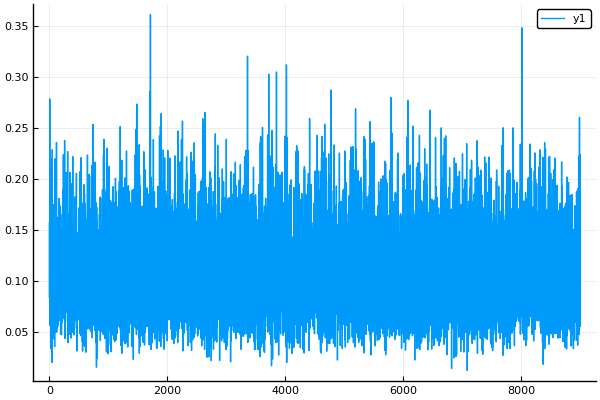

In [85]:
#plt.plot(beta[l])
plot(lam[l,3])

In [207]:
x = randn()
    if x <= x1
        rand() < (cdf(Normal(0,1),x1) - cdf(Normal(0,1),x)) # aceita
    end

cdf(Normal(0,1),1)
cdf(Normal(0,1),0)

0.5

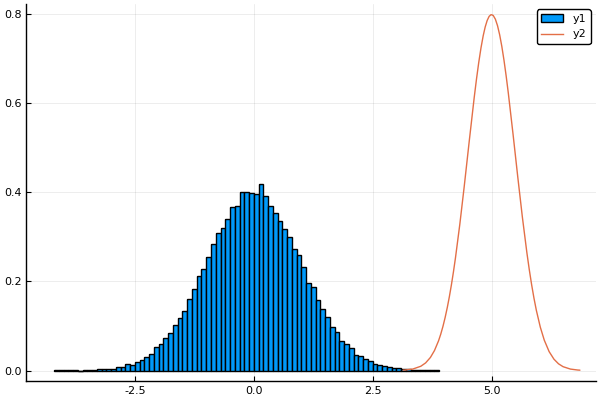

In [265]:
plot(Normal(0,1))
x1 = 10
M  = 100_000
aceitos = zeros(0)
for i=1:M
    θ = randn()
    x = rand(Normal(θ,1))
    if x <= x1
        if rand() < 1- (cdf(Normal(θ,1),x1) - cdf(Normal(θ,1),x)) # aceita
            append!(aceitos, θ)
        end
    else
#         print(i)
#         if rand() < (1 - cdf(Normal(0,1),x1)) # aceita
        if rand() < 1 - (cdf(Normal(θ,1),x) - cdf(Normal(θ,1),x1)) # aceita
            append!(aceitos, θ)
        end
    end
end
# aceitos
histogram(aceitos,normalize=true)
plot!(Normal((x1/2),0.5))

In [236]:
sigma2  = (1+1)^-1

0.5